# Lab 1

Welcome to the first lab of PSTAT 134/234! This lab is meant to help you familiarize yourself with JupyterHub, review Python and NumPy, and introduce you to `matplotlib`, a Python visualization library.

_Note: adapted from a version from [John Denero](http://denero.org/)_

---
## Part 1: Using Jupyter

### Running Cells and Displaying Output

Run the following cell.  If you are unfamiliar with Jupyter Notebooks, skim [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help --> Notebook Help** in the menu bar above then click on **Notebook Basics**.

In [1]:
print("Hello World!")

Hello World!


In Jupyter notebooks, all print statements are displayed below the cell. Furthermore, the output of the last line is displayed following the cell upon execution.

In [2]:
"Will this line be displayed?"

print("Hello" + ",", "world!")

5 + 3

Hello, world!


8

### Viewing Documentation

To output the documentation for a function, use the `help` function.

In [3]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



You can also use Jupyter to view function documentation inside your notebook. The function must already be defined in the kernel for this to work.

Below, click your mouse anywhere on `print()` and use `Shift` + `Tab` to view the function's documentation. 

In [5]:
print('Welcome to PSTAT 134/234.')

Welcome to PSTAT 134/234.


### Importing Libraries and Magic Commands

We will be using common Python libraries to help us process data. By convention, we import all libraries at the very top of the notebook. There are also a set of standard aliases that are used to shorten the library names. Below are some of the libraries that you may encounter throughout the course, along with their respective aliases.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`%matplotlib inline` is a [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that configures the notebook so that Matplotlib displays any plots that you draw directly in the notebook rather than to a file, allowing you to view the plots upon executing your code.

Another useful magic command is `%%time`, which times the execution of that cell. You can use this by writing it as the first line of a cell. (Note that `%%` is used for *cell magic commands* that apply to the entire cell, whereas `%` is used for *line magic commands* that only apply to a single line.)

In [8]:
%%time

lst = []
for i in range(10000):
    lst.append(i)

Wall time: 1.98 ms


### Keyboard Shortcuts

Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts, go to **Help --> Keyboard Shortcuts** in the menu above. 

Here are a few that we like:
1. `Ctrl` + `Return` : *Evaluate the current cell*
1. `Shift` + `Return`: *Evaluate the current cell and move to the next*
1. `ESC` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `z` : *undo the last cell operation*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

---
## Part 2: Prerequisites

### Python

Python is the main programming language we'll use in the course. We expect that you've taken CS 61A, Data 8, or an equivalent class, so we will not be covering general Python syntax. If any of the below exercises are challenging (or if you would like to refresh your Python knowledge), please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.5/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

#### Question 1a

Write a function `summation` that evaluates the following summation for $n \geq 1$:

$$\sum_{i=1}^{n} i^3 + 3 i^2$$

<!--
BEGIN QUESTION
name: q1a
-->

In [25]:
def summation(n):
    """Compute the summation i^3 + 3 * i^2 for 1 <= i <= n."""
    vec = [i ** 3 + 3 * i ** 2 for i in range(1, n + 1)]
    return sum(vec)

''' Test the function'''

summation(2)

24

#### Question 1b

Write a function `list_sum` that computes the square of each value in `list_1`, the cube of each value in `list_2`, then returns a list containing the element-wise sum of these results. Assume that `list_1` and `list_2` have the same number of elements. 

<!--
BEGIN QUESTION
name: q1b
-->

In [88]:
def list_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    
    calc1 = [i**2 for i in list_1]
    calc2 = [i**3 for i in list_2]
    
    calc = np.add(calc1, calc2)
    
    return calc
    
    # Your answer here
    
list_1 = [1, 2, 3]
list_2 = [1, 2, 3]
    
list_sum(list_1, list_2)
    

array([ 2, 12, 36])

#### Question 1c

Write a function `average` that takes a number and returns the average of all inputs on which it has ever been called. *Challenge:* Can you do it without any global names besides `average`?

<!--
BEGIN QUESTION
name: q1c
-->

In [9]:
def average(n):
    """Return the average of all arguments ever passed to the average function.
    
    >>> average(1)
    1.0
    >>> average(3)
    2.0
    >>> average(8)
    4.0
    >>> average(0)
    3.0
    """
    # Your answer here
# Please don't call average here, or you'll confuse the automated tests.

### NumPy

NumPy is the numerical computing module introduced in Data 8, which is a prerequisite for this course. Here's a quick recap of NumPy. For more review, read the following materials.

- **[NumPy Quick Start Tutorial](https://docs.scipy.org/doc/numpy-1.15.4/user/quickstart.html)**
- **[Stanford CS231n NumPy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)**

#### Question 2

The core of NumPy is the array. Like Python lists, arrays store data; however, they store data in a more efficient manner. In many cases, this allows for faster computation and data manipulation.

In Data 8, we used `make_array` from the `datascience` module, but that's not the most typical way. Instead, use `np.array` to create an array. It takes a sequence, such as a list or range. 

Below, create an array `arr` containing the values 1, 2, 3, 4, and 5 (in that order).

<!--
BEGIN QUESTION
name: q2
-->

In [10]:
arr = np.array([1, 2, 3, 4, 5]) # SOLUTION

In addition to values in the array, we can access attributes such as shape and data type. A full list of attributes can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html#array-attributes).

In [11]:
arr[3]

4

In [12]:
arr[2:4]

array([3, 4])

In [13]:
arr.shape

(5,)

In [14]:
arr.dtype

dtype('int64')

Arrays, unlike Python lists, cannot store items of different data types.

In [15]:
# A regular Python list can store items of different data types
[1, '3']

[1, '3']

In [16]:
# Arrays will convert everything to the same data type
np.array([1, '3'])

array(['1', '3'], dtype='<U21')

In [17]:
# Another example of array type conversion
np.array([5, 8.3])

array([5. , 8.3])

Arrays are also useful in performing *vectorized operations*. Given two or more arrays of equal length, arithmetic will perform element-wise computations across the arrays. 

For example, observe the following:

In [18]:
# Python list addition will concatenate the two lists
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [19]:
# NumPy array addition will add them element-wise
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

#### Question 3a

Given the array `random_arr`, assign `valid_values` to an array containing all values $x$ such that $2x^4 > 1$.

<!--
BEGIN QUESTION
name: q3a
-->

In [103]:
np.random.seed(42)
random_arr = np.random.rand(60)
valid_values = random_arr[(2 * random_arr  ** 4 > 1)] # SOLUTION

#### Question 3b

Use NumPy to recreate your answer to Question 1b. The input parameters will both be lists, so you will need to convert the lists into arrays before performing your operations.

**Hint:** Use the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html). If you're stuck, try a search engine! Searching the web for examples of how to use modules is very common in data science.

<!--
BEGIN QUESTION
name: q3b
-->

In [3]:
def array_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    
    Return a NumPy array.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    
    arr_1 = np.array(list_1) ** 2
    arr_2 = np.array(list_2) ** 3
    
    arr = arr_1 + arr_2
    
    return(arr)

list_1 = [1, 2, 3]
list_2 = [1, 2, 3]

array_sum(list_1, list_2)
    
    # Your answer here

array([ 2, 12, 36], dtype=int32)

You might have been told that Python is slow, but array arithmetic is carried out very fast, even for large arrays.

For ten numbers, `list_sum` and `array_sum` both take a similar amount of time.

In [115]:
sample_list_1 = list(range(10))
sample_array_1 = np.arange(10)

In [116]:
%%time
list_sum(sample_list_1, sample_list_1)

Wall time: 0 ns


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

In [117]:
%%time
array_sum(sample_array_1, sample_array_1)

Wall time: 0 ns


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810], dtype=int32)

The time difference seems negligible for a list/array of size 10; depending on your setup, you may even observe that `list_sum` executes faster than `array_sum`! However, we will commonly be working with much larger datasets:

In [118]:
sample_list_2 = list(range(100000))
sample_array_2 = np.arange(100000)

In [119]:
%%time
list_sum(sample_list_2, sample_list_2)
; # The semicolon hides the output

Wall time: 138 ms


In [120]:
%%time
array_sum(sample_array_2, sample_array_2)
;

Wall time: 3.45 ms


With the larger dataset, we see that using NumPy results in code that executes over 50 times faster! Throughout this course (and in the real world), you will find that writing efficient code will be important; arrays and vectorized operations are the most common way of making Python programs run quickly.

---
## Part 3: Matplotlib
We're going to start by going through the official `pyplot` tutorial. Please go through the [tutorial notebook](pyplot.ipynb) and familiarize yourself with the basics of `pyplot`. This should take roughly 25 minutes.

#### A note on `np.arange` and `np.linspace`

The tutorial uses `np.arange`, which returns an array that steps from `a` to `b` with a fixed step size `s`. While this is fine in some cases, we sometimes prefer to use `np.linspace(a, b, N)`, which divides the interval `[a, b]` into N equally spaced points.

For example, `np.linspace` always includes both end points while `np.arange` will *not* include the second end point `b`. For this reason, when we are plotting ranges of values we tend to prefer `np.linspace`.

Notice how the following two statements have different parameters but return the same result.

In [110]:
np.arange(-5, 6, 1.0)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [111]:
np.linspace(-5, 5, 11)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

Now that you're familiar with the basics of `pyplot`, let's practice with a plotting question.

### Question 4

Let's visualize the function $f(t) = 3\sin(2\pi t)$. Set the `x` limit of all figures to $[0, \pi]$ and the `y` limit to $[-10, 10]$. Plot the sine function using `plt.plot` with 30 red plus signs. Additionally, make sure the x ticks are labeled $[0, \frac{\pi}{2}, \pi]$, and that your axes are labeled as well. You can use the [matplotlib documentation](https://matplotlib.org/api/pyplot_api.html) for reference.

Your plot should look like the following:

![4.png](4.png)

Hint 1: You can set axis bounds with `plt.axis`.

Hint 2: You can set xticks and labels with `plt.xticks`.

Hint 3: Make sure you add `plt.xlabel`, `plt.ylabel`, `plt.title`.

Text(0.5, 1.0, '$f(t) = 3\\mathrm{sin}(2\\pi t)$')

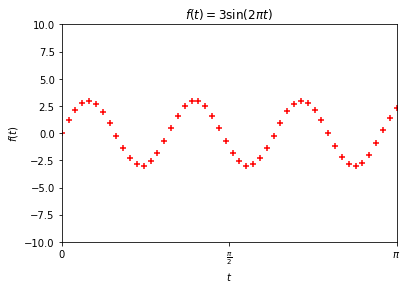

In [36]:
def f(t):
    return(3 * np.sin(2 * np.pi * t))

T = {"t": np.linspace(0, np.pi, 50)}
T["f"] = f(T["t"])

plt.scatter(x = "t", y = "f", c = "r", marker = "+", data = T)
plt.axis([0, np.pi, -10, 10])
plt.xticks([0, np.pi/2, np.pi], [0, r'$\frac{\pi}{2}$', r'$\pi$'])
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.title(r"$f(t) = 3\mathrm{sin}(2\pi t)$")
